In [57]:
#random forest bla bla 
#imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier

from scipy.stats import randint

import matplotlib as mpl
import matplotlib.pyplot as plt


In [68]:
#random forest classifier
instance_based_df = pd.read_csv("data_new/instance_based_df.csv")
instance_based_target = instance_based_df['mood_avg_next']
y = instance_based_target.round() #y is je target dus de mood_avg_next
instance_based_cont = instance_based_df.drop('mood_avg_next', axis = 1)
X = instance_based_cont.round() #X zijn je features

column_indices = {name: i for i, name in enumerate(X.columns)}
n = len(X)

#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

#model fitting en evaluation
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

#prediction
y_prediction = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

#hyperparameter tuning
param_dist = {'n_estimators': randint(20,500),
              'max_depth': randint(1,20)}

#random search gebruiken om de beste hyperparameters te vinden, n_iter (the number of parameter settings that are sampled) and cv (the number of cross-validation folds to use)
rand_search = RandomizedSearchCV(rf_classifier, param_distributions= param_dist, n_iter=5, cv=5)  
                                                                                                  
#random search fitten op data
rand_search.fit(X_train, y_train)

#create variable for best model
best_rf_classifier = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

#confusion matrix (tradeoff between false positives (top right) and false negatives(bottom left)
y_pred = best_rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix= cm).plot()

#precision, recall, accuracy, F1-score, support
print(classification_report(y_test, y_pred))

    mood_avg  utilities_avg  social_avg  arousal_avg  screen_avg  office_avg  \
32       7.0           18.0        65.0         -0.0        89.0        33.0   
76       7.0           12.0        93.0         -0.0       120.0       101.0   
28       7.0           15.0        58.0         -0.0        82.0        26.0   
22       7.0           12.0        57.0         -0.0        79.0        73.0   
13       7.0           10.0        83.0          0.0        71.0        77.0   
79       7.0           16.0        85.0         -0.0       122.0       101.0   
43       7.0           15.0        89.0         -0.0        85.0        72.0   
53       7.0           12.0        81.0         -0.0        93.0        22.0   
34       7.0           20.0        82.0          0.0        88.0        46.0   
48       7.0           32.0        92.0         -0.0        82.0        25.0   
63       7.0           10.0        86.0         -0.0       106.0        20.0   
33       7.0           19.0        79.0 

    mood_avg  utilities_avg  social_avg  arousal_avg  screen_avg  office_avg  \
0   7.223611      13.062000   33.491833     0.259722   55.066533   17.086000   
1   7.234722      13.062000   33.491833     0.148611   55.066533   17.086000   
2   7.106944      13.062000   33.491833     0.126389   55.066533   17.086000   
3   7.019444      13.062000   33.491833     0.201389   55.066533   17.086000   
4   6.979861      13.062000   51.066854     0.015972   53.571921   17.086000   
..       ...            ...         ...          ...         ...         ...   
91  7.200000       2.164840   63.358533    -0.300000   94.329205   44.738625   
92  7.250000       2.110683   74.889542    -0.500000   94.590693   44.738625   
93  7.333333       2.072000   93.483685    -0.666667  112.722116   44.738625   
94  7.250000       2.072000  122.092500    -1.250000  145.106578   44.738625   
95  6.500000       2.072000  190.760000    -1.500000  161.599714   44.738625   

    call_avg  other_avg  valence_avg  u

c:\Users\eigenaar\Documents\Data_mining\Data-Mining-For-The-Girls\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': 11, 'n_estimators': 205}
              precision    recall  f1-score   support

         6.0       0.00      0.00      0.00         7
         7.0       0.10      1.00      0.18         1
         8.0       0.00      0.00      0.00         2

    accuracy                           0.10        10
   macro avg       0.03      0.33      0.06        10
weighted avg       0.01      0.10      0.02        10



c:\Users\eigenaar\Documents\Data_mining\Data-Mining-For-The-Girls\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eigenaar\Documents\Data_mining\Data-Mining-For-The-Girls\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eigenaar\Documents\Data_mining\Data-Mining-For-The-Girls\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

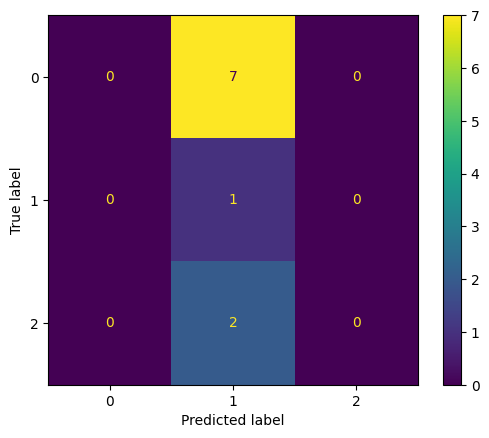

In [78]:
#random forest classifier
instance_based_df = pd.read_csv("data_new/instance_based_df.csv")
print(instance_based_df)
instance_based_df_discrete = instance_based_df.round()
instance_based_target = instance_based_df['mood_avg_next']
y = instance_based_target.round()
instance_based_cont = instance_based_df.drop('mood_avg_next', axis = 1)
X = instance_based_cont.round()

# column_indices = {name: i for i, name in enumerate(X.columns)}
# n = len(X)

#data split
train_df = instance_based_df_discrete[0:int(n*0.7)]
val_df = instance_based_df_discrete[int(n*0.7):int(n*0.9)]
test_df = instance_based_df_discrete[int(n*0.9):]

# num_features = X.shape[1]
X_train = train_df.drop('mood_avg_next', axis = 1)
y_train = train_df['mood_avg_next']
X_val = val_df.drop('mood_avg_next', axis = 1)
y_val = val_df['mood_avg_next']
X_test = test_df.drop('mood_avg_next', axis = 1)
y_test = test_df['mood_avg_next']

#model fitting en evaluation
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

#prediction
y_prediction = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

#hyperparameter tuning
param_dist = {'n_estimators': randint(20,500),
              'max_depth': randint(1,20)}

#random search gebruiken om de beste hyperparameters te vinden, n_iter (the number of parameter settings that are sampled) and cv (the number of cross-validation folds to use)
rand_search = RandomizedSearchCV(rf_classifier, param_distributions= param_dist, n_iter=5, cv=5)  
                                                                                                  
#random search fitten op data
rand_search.fit(X_train, y_train)

#create variable for best model
best_rf_classifier = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

#confusion matrix (tradeoff between false positives (top right) and false negatives(bottom left)
y_pred = best_rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix= cm).plot()

#precision, recall, accuracy, F1-score, support
print(classification_report(y_test, y_pred))

In [ ]:
#random forest classifier
instance_based_df = pd.read_csv("data_new/instance_based_df.csv")
instance_based_target = instance_based_df['mood_avg_next']
instance_based_tXarget_discrete = instance_based_target.round()

instance_based_cont = instance_based_df.drop('mood_avg_next', axis = 1)
instance_based_features_discrete = instance_based_cont.round()
column_indices = {name: i for i, name in enumerate(instance_based_features_discrete.columns)}

n = len(instance_based_features_discrete)
train_df = instance_based_features_discrete[0:int(n*0.7)]
val_df = instance_based_features_discrete[int(n*0.7):int(n*0.9)]
test_df = instance_based_features_discrete[int(n*0.9):]
print(test_df)
num_features = instance_based_features_discrete.shape[1]

x_train = instance_based_features_discrete
y_train = instance_based_target_discrete

rf_classifier = RandomForestClassifier(n_estimators= 100, max_depth = None, random_state=42)
rf_classifier.fit(x_train, y_train )

#prediction
y_prediction = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_prediction)

# # validation
# val_predictions = rf_classifier.predict(val_df)
# y_true_poep = instance_based_target_discrete[int(n*0.7):int(n*0.9)]
# y_true = y_true_poep.values


# #accuracy, precision, recall, F1-score, confusion matrix
# report = classification_report(y_true, val_predictions)
# print(report)